# Dataset - dutch weather + air_quality

## Installing packages

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import math
import collections
from datetime import date

from statistics import mode
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor

import warnings
warnings.filterwarnings('ignore') 

## Importing data

In [2]:
air_quality = pd.read_csv(r'C:\Users\claud\data_final_project\air_quality.csv')
weather = pd.read_csv(r'C:\Users\claud\data_final_project\dutchweather1.csv')
# not using the version without the outliers to not cut off the dates before merging data

In [3]:
air_quality.head()

date  pm25  pm10    o3   no2   co  no2index pm10index   o3index  \
0  20131231  50.0  19.0  25.0  30.0  3.0  very low  very low  very low   
1  20140101  50.0  42.0  25.0  32.0  3.0  very low       low  very low   
2  20140102  50.0  14.0  25.0  28.0  3.0  very low  very low  very low   
3  20140103  50.0  17.0  25.0  26.0  3.0  very low  very low  very low   
4  20140104  50.0  19.0  25.0  28.0  3.0  very low  very low  very low   

  pm25index  
0    medium  
1    medium  
2    medium  
3    medium  
4    medium

In [4]:
air_quality.shape

(2666, 10)

In [5]:
weather.head()

date  ddvec  fhvec  fg  tg    q  dr  rh     pg   ng  ug  ev24  rain  \
0  20131231    167     72  73  66  179  53  40  10103  8.0  83     2     1   
1  20140101    168     78  80  68  182  45  28  10020  7.0  89     2     1   
2  20140102    191     62  70  83  193  20  16   9971  5.0  88     3     1   
3  20140103    199     91  97  85  167  33  33   9993  6.0  86     2     1   
4  20140104    169     64  69  76  182   5   4   9985  7.0  86     2     1   

   rainy  
0      1  
1      1  
2      1  
3      1  
4      1

In [6]:
weather.shape

(2879, 14)

- Merging the tables

In [7]:
weather = weather.set_index('date')
air_quality = air_quality.set_index('date')

In [8]:
data = pd.concat([weather, air_quality], axis=1)
data.head()

ddvec  fhvec  fg  tg    q  dr  rh     pg   ng  ug  ...  rainy  pm25  \
date                                                         ...                
20131231    167     72  73  66  179  53  40  10103  8.0  83  ...      1  50.0   
20140101    168     78  80  68  182  45  28  10020  7.0  89  ...      1  50.0   
20140102    191     62  70  83  193  20  16   9971  5.0  88  ...      1  50.0   
20140103    199     91  97  85  167  33  33   9993  6.0  86  ...      1  50.0   
20140104    169     64  69  76  182   5   4   9985  7.0  86  ...      1  50.0   

          pm10    o3   no2   co  no2index  pm10index   o3index pm25index  
date                                                                      
20131231  19.0  25.0  30.0  3.0  very low   very low  very low    medium  
20140101  42.0  25.0  32.0  3.0  very low        low  very low    medium  
20140102  14.0  25.0  28.0  3.0  very low   very low  very low    medium  
20140103  17.0  25.0  26.0  3.0  very low   very low  very low    medium  
20140104  19.0  25.0  28.0  3.0  very low   very low  very low    medium  

[5 rows x 22 columns]

In [9]:
data.tail()

ddvec  fhvec  fg   tg    q  dr  rh     pg   ng  ug  ...  rainy  \
date                                                          ...          
20211113    265      9  25  113  307  44  78  10116  8.0  93  ...      1   
20211114     64     32  33   99  202   0   0  10237  8.0  91  ...      1   
20211115     63     31  33   67   63   0   0  10268  8.0  89  ...      1   
20211116    173     20  24   52   67   9   1  10226  8.0  90  ...      0   
20211117    246     36  46   88  310   9   4  10211  6.0  86  ...      1   

          pm25  pm10    o3   no2   co  no2index  pm10index   o3index pm25index  
date                                                                            
20211113  50.0  22.0   9.0  12.0  3.0  very low   very low  very low    medium  
20211114  50.0  22.0  15.0  13.0  3.0  very low   very low  very low    medium  
20211115  50.0  25.0  13.0  16.0  3.0  very low        low  very low    medium  
20211116  50.0  40.0  25.0  20.0  3.0  very low        low  very low    medium  
20211117   NaN   NaN   NaN   NaN  NaN       NaN        NaN       NaN       NaN  

[5 rows x 22 columns]

In [10]:
data.shape

(2879, 22)

## Data cleaning

In [11]:
data.dtypes

ddvec          int64
fhvec          int64
fg             int64
tg             int64
q              int64
dr             int64
rh             int64
pg             int64
ng           float64
ug             int64
ev24           int64
rain           int64
rainy          int64
pm25         float64
pm10         float64
o3           float64
no2          float64
co           float64
no2index      object
pm10index     object
o3index       object
pm25index     object
dtype: object

In [12]:
data.isna().sum()

ddvec          0
fhvec          0
fg             0
tg             0
q              0
dr             0
rh             0
pg             0
ng             0
ug             0
ev24           0
rain           0
rainy          0
pm25         213
pm10         213
o3           213
no2          213
co           213
no2index     213
pm10index    213
o3index      213
pm25index    213
dtype: int64

- Here above we can see the date missing values from the air_quality dataset.

- On excel was possible to see that 6 months of information are missing from 06/2017 to 01/2018.

- Let's drop those lines

In [13]:
data = data[data['pm25'].notna()]

## EDA

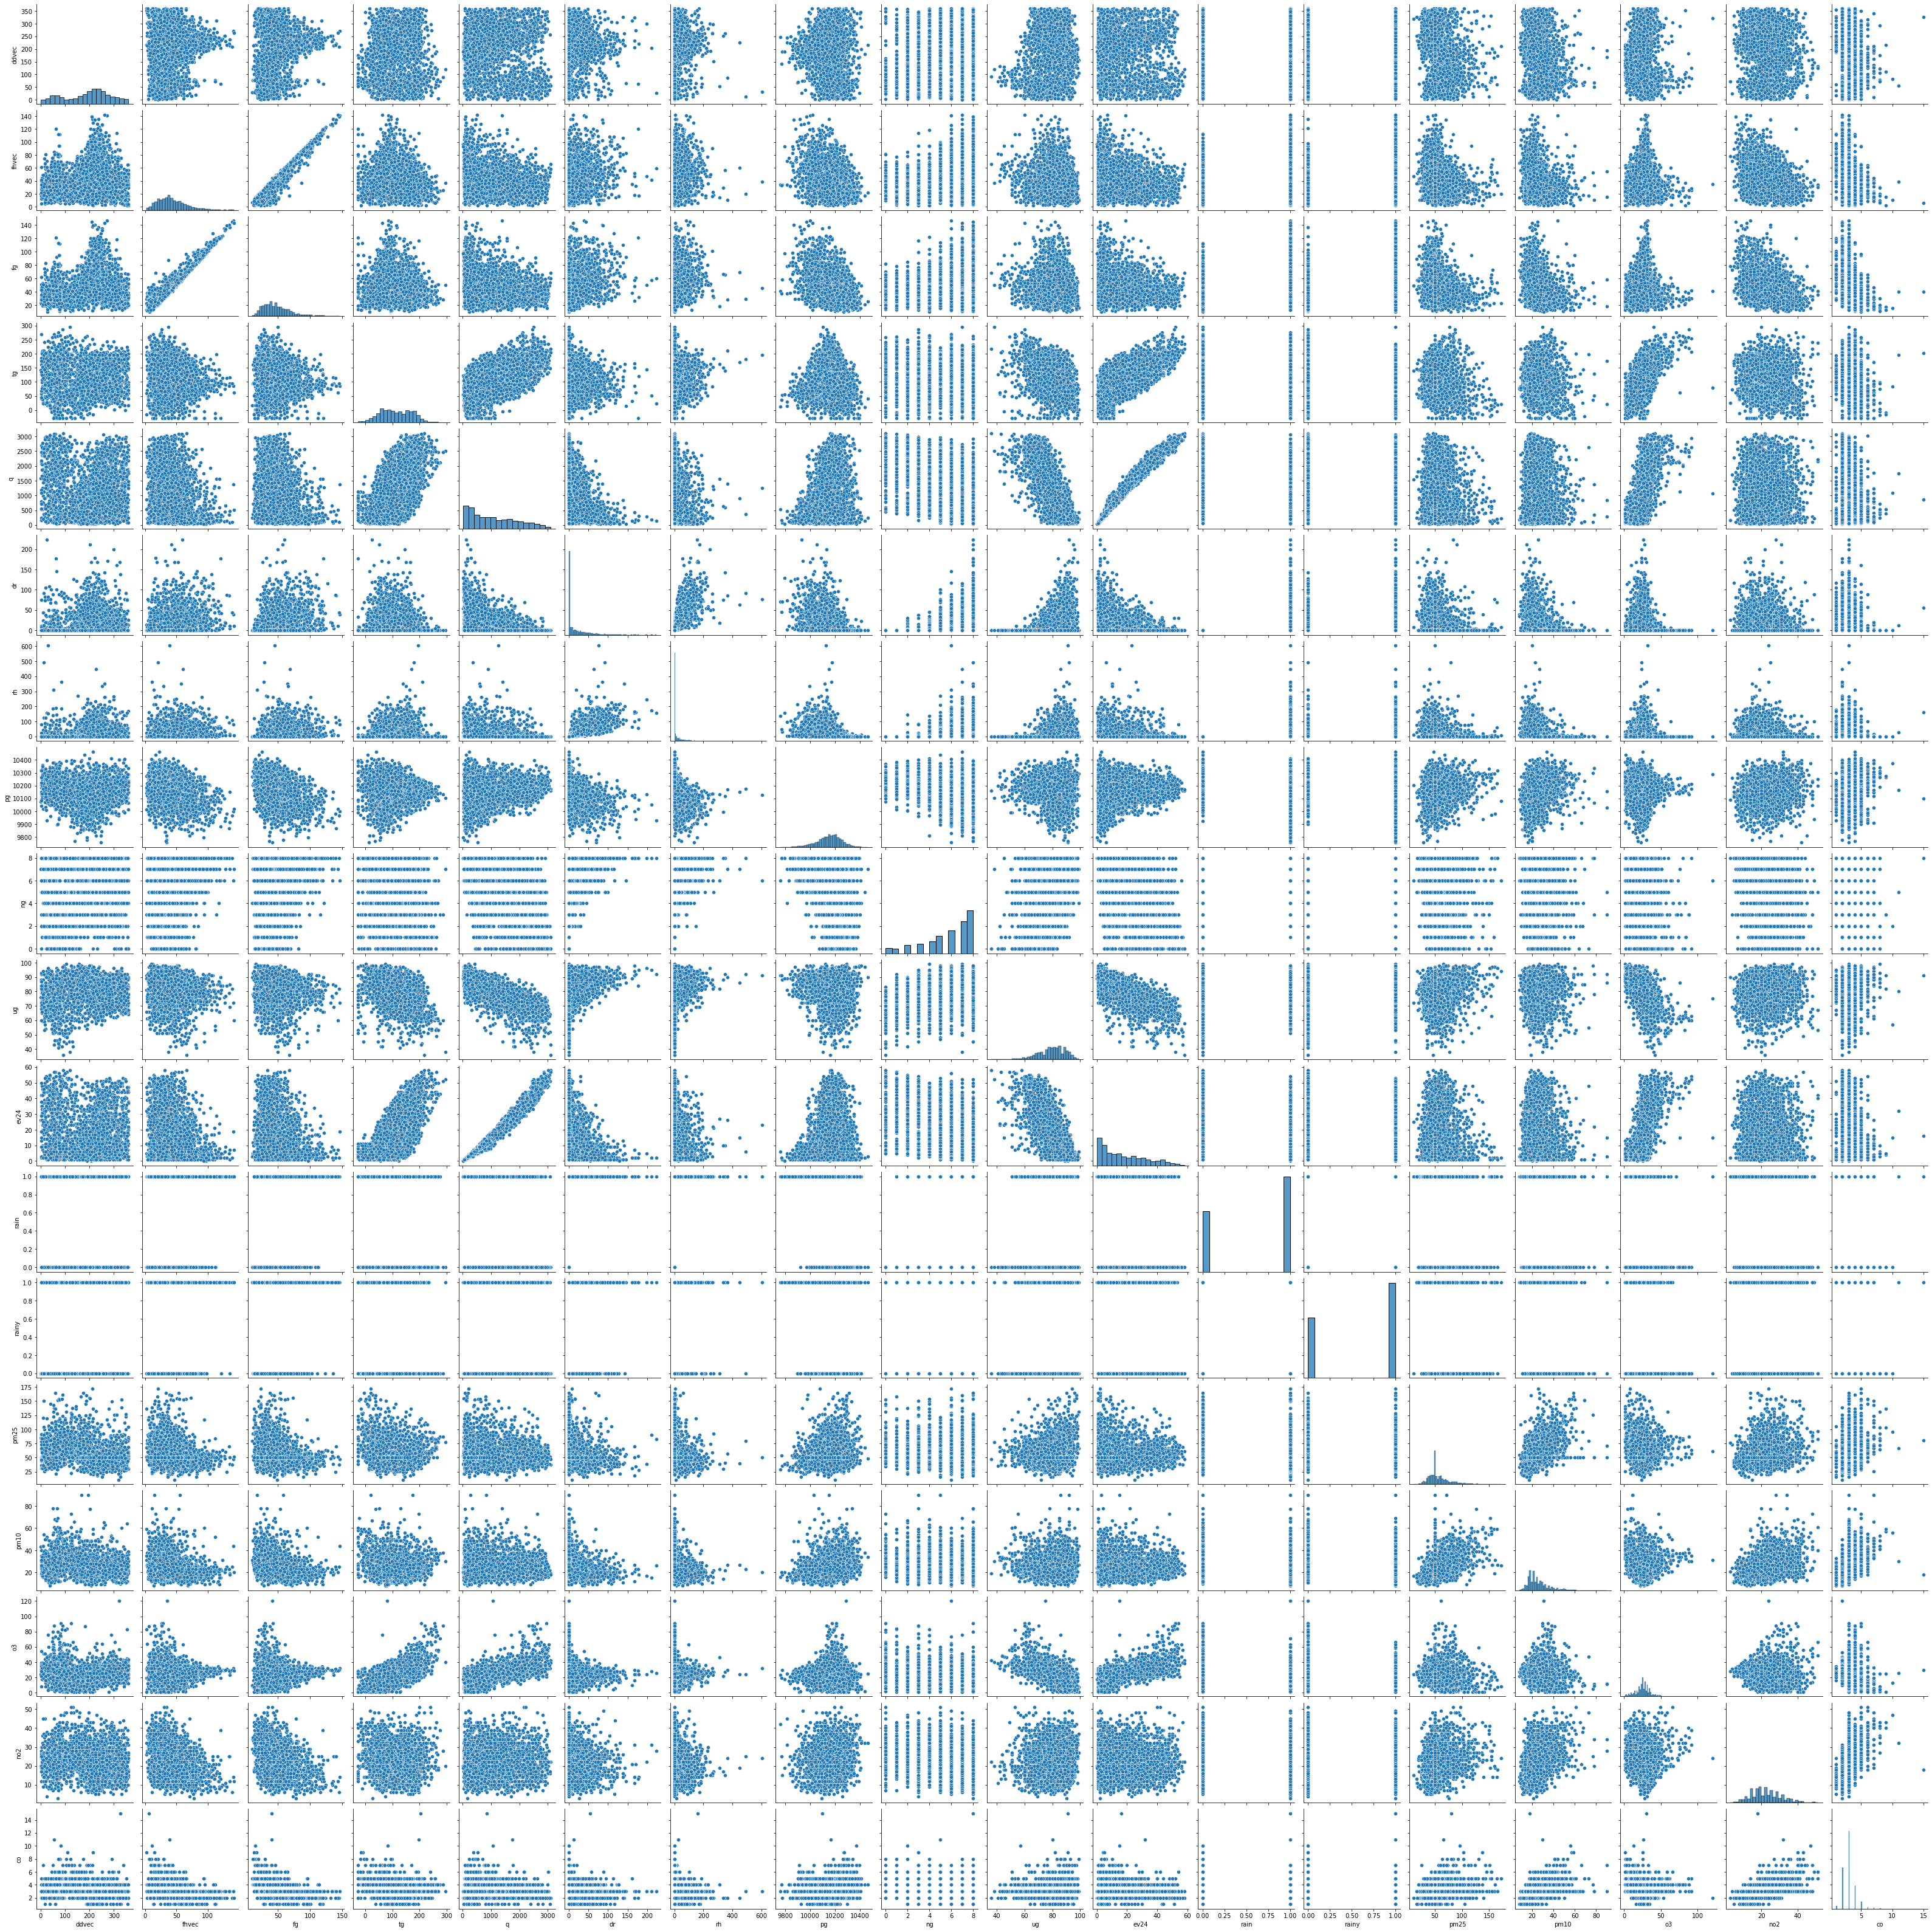

In [14]:
sns.pairplot(data)

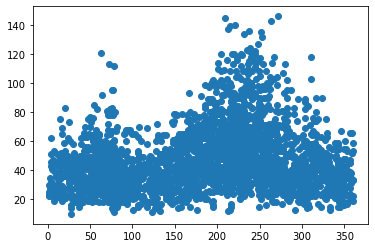

In [15]:
plt.scatter(data['ddvec'], data['fg'])

In [16]:
numerical = data.select_dtypes([np.number])

In [17]:
def hists(df):
    for column in df.columns:
        sns.distplot(df[column])
        plt.show()

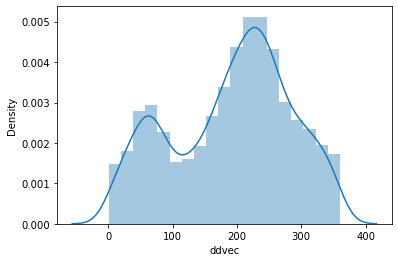

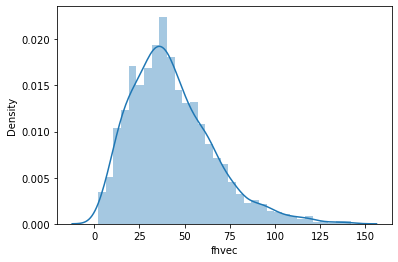

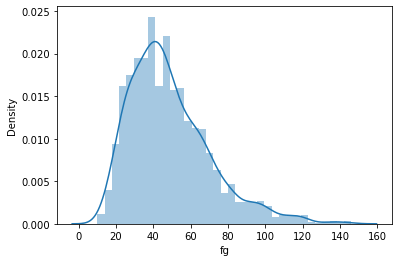

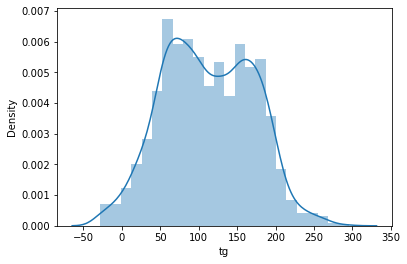

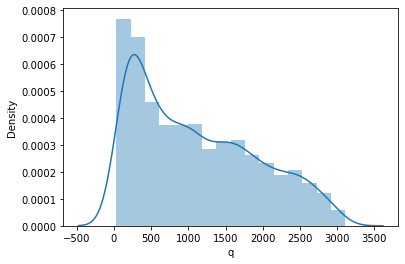

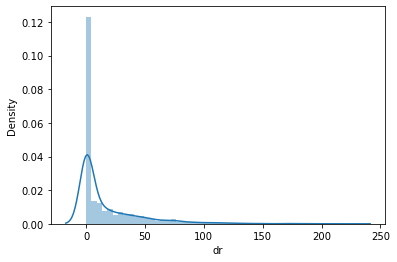

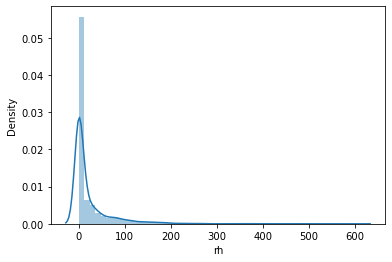

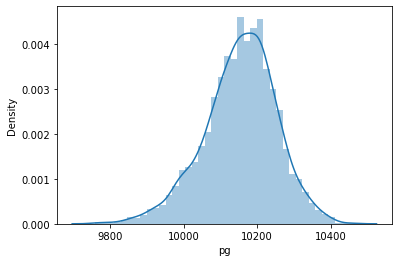

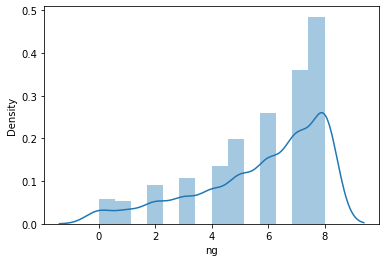

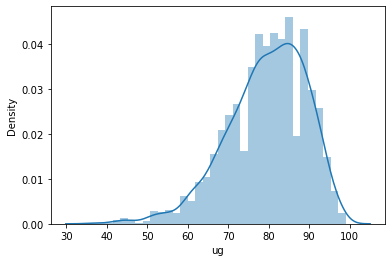

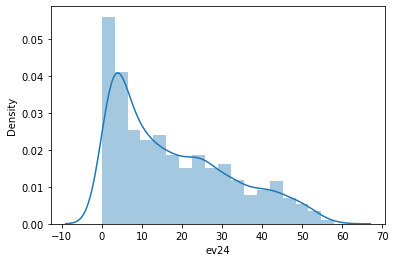

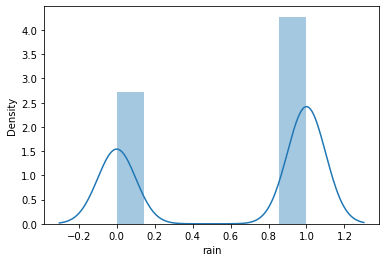

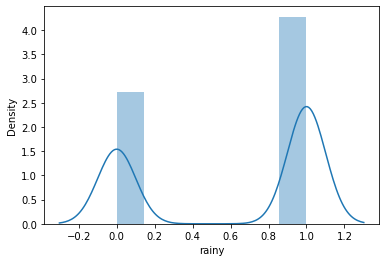

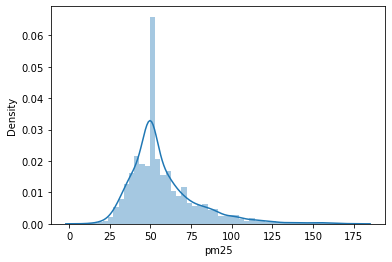

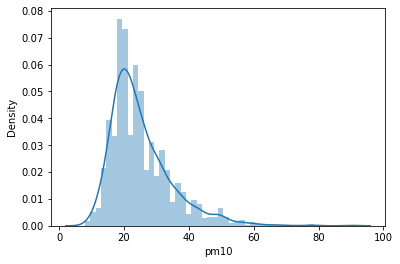

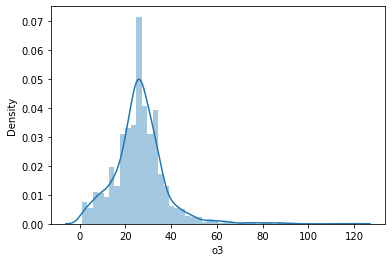

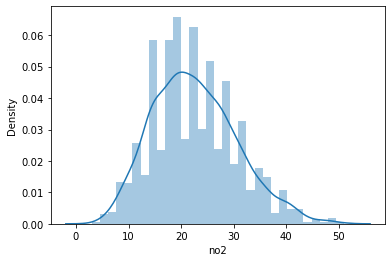

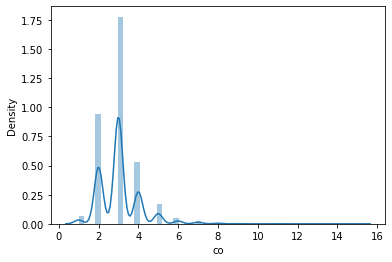

In [18]:
hists(numerical)

In [19]:
def boxplots(df):
    for column in df.columns:
        sns.boxplot(x = column, data = df)
        plt.show()

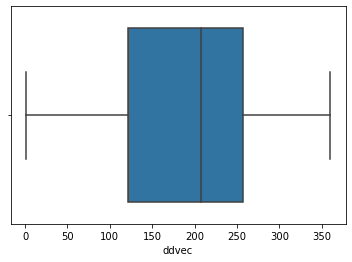

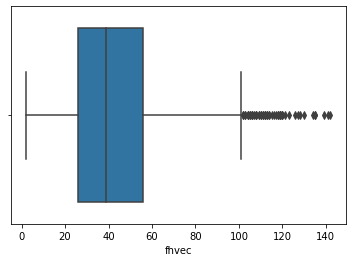

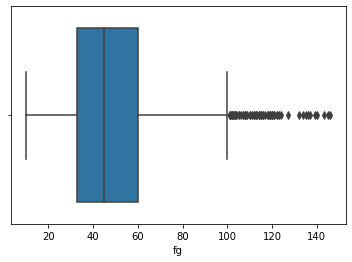

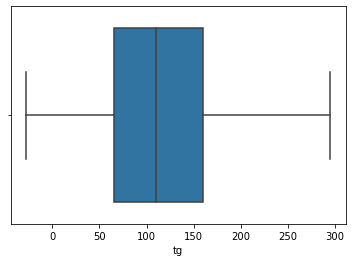

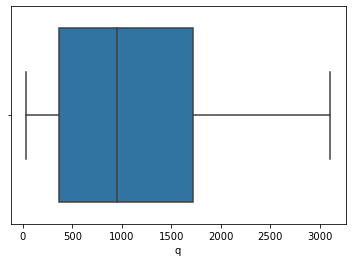

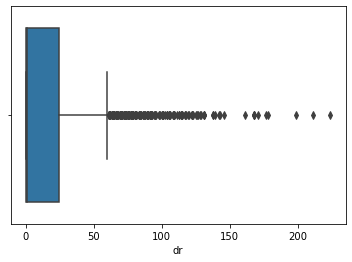

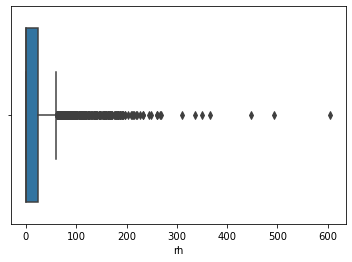

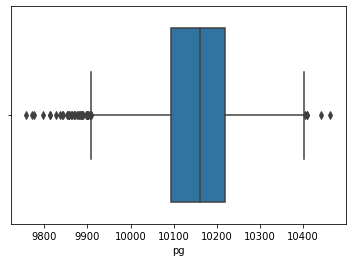

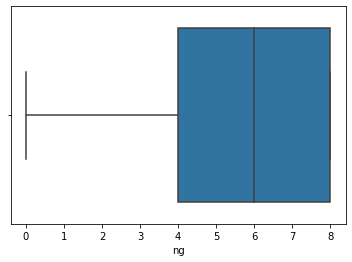

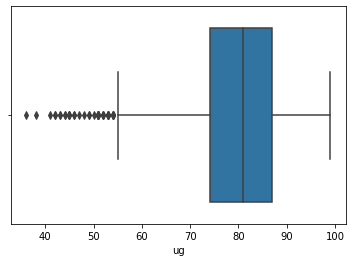

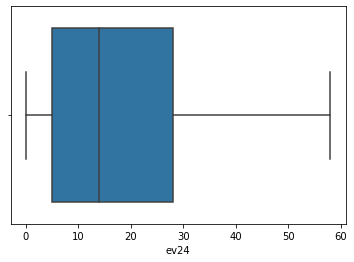

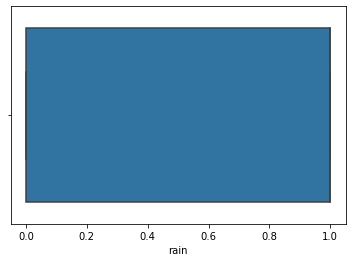

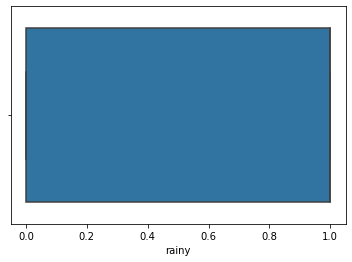

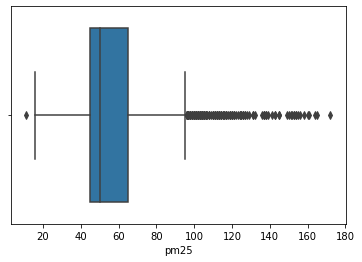

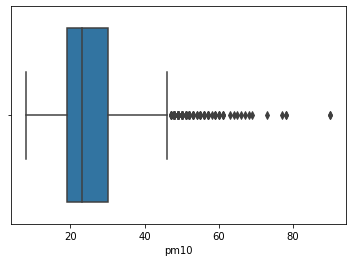

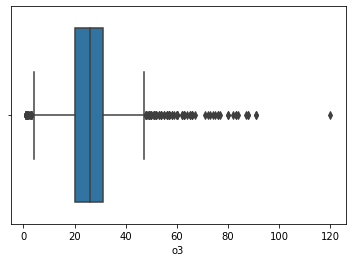

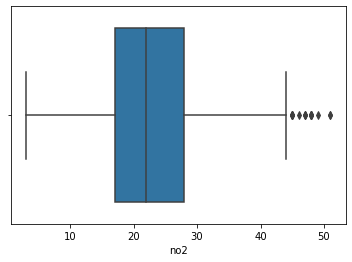

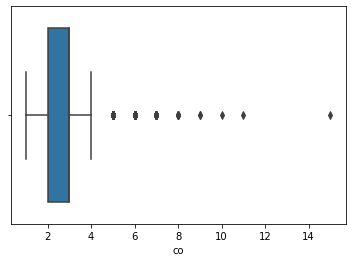

In [20]:
boxplots(numerical)

In [21]:
summary = data.describe().T
# iqr -> inter quartile range
summary['iqr'] = summary['75%']-summary['25%']
summary = summary.apply(round) # lambda x: round(x, 2)
summary

count     mean    std     min      25%      50%      75%      max  \
ddvec  2666.0    192.0   92.0     1.0    121.0    207.0    257.0    360.0   
fhvec  2666.0     43.0   23.0     2.0     26.0     39.0     56.0    142.0   
fg     2666.0     49.0   22.0    10.0     33.0     45.0     60.0    146.0   
tg     2666.0    112.0   59.0   -28.0     66.0    110.0    160.0    295.0   
q      2666.0   1106.0  817.0    31.0    361.0    955.0   1717.0   3108.0   
dr     2666.0     17.0   28.0     0.0      0.0      1.0     24.0    224.0   
rh     2666.0     22.0   45.0     0.0      0.0      1.0     24.0    605.0   
pg     2666.0  10154.0   99.0  9757.0  10095.0  10160.0  10219.0  10464.0   
ng     2666.0      6.0    2.0     0.0      4.0      6.0      8.0      8.0   
ug     2666.0     80.0   10.0    36.0     74.0     81.0     87.0     99.0   
ev24   2666.0     18.0   14.0     0.0      5.0     14.0     28.0     58.0   
rain   2666.0      1.0    0.0     0.0      0.0      1.0      1.0      1.0   
rainy  2666.0      1.0    0.0     0.0      0.0      1.0      1.0      1.0   
pm25   2666.0     58.0   21.0    11.0     45.0     50.0     65.0    172.0   
pm10   2666.0     25.0   10.0     8.0     19.0     23.0     30.0     90.0   
o3     2666.0     26.0   11.0     1.0     20.0     26.0     31.0    120.0   
no2    2666.0     23.0    8.0     3.0     17.0     22.0     28.0     51.0   
co     2666.0      3.0    1.0     1.0      2.0      3.0      3.0     15.0   

          iqr  
ddvec   136.0  
fhvec    30.0  
fg       27.0  
tg       94.0  
q      1356.0  
dr       24.0  
rh       24.0  
pg      124.0  
ng        4.0  
ug       13.0  
ev24     23.0  
rain      1.0  
rainy     1.0  
pm25     20.0  
pm10     11.0  
o3       11.0  
no2      11.0  
co        1.0

In [22]:
"""
def remove_outliers(df, threshold=1.5, in_columns=df.select_dtypes(np.number).columns, skip_columns=[]):
    for column in in_columns:
        if column not in skip_columns:
            upper = np.percentile(df[column],75)
            lower = np.percentile(df[column],25)
            iqr = upper - lower
            upper_limit = upper + (threshold * iqr)
            lower_limit = lower - (threshold * iqr)
            df = df[(df[column]>lower_limit) & (df[column]<upper_limit)]
    return df
"""

'\ndef remove_outliers(df, threshold=1.5, in_columns=df.select_dtypes(np.number).columns, skip_columns=[]):\n    for column in in_columns:\n        if column not in skip_columns:\n            upper = np.percentile(df[column],75)\n            lower = np.percentile(df[column],25)\n            iqr = upper - lower\n            upper_limit = upper + (threshold * iqr)\n            lower_limit = lower - (threshold * iqr)\n            df = df[(df[column]>lower_limit) & (df[column]<upper_limit)]\n    return df\n'

In [23]:
#data1 = data.copy()

#data1 = remove_outliers(data1, threshold=1.5, skip_columns=['ddvec', 'tg', 'q', 'ng', 'ev24', 'rain', 'rainy'])
# 'ng' is in skip_columns even if it has outliers bc the outlier is zero and that's a valid option

#data1 = remove_outliers(data1, threshold=1.5, in_columns=['fhvec', 'fg', 'dr', 'rh', 'pg', 'ug'])

In [24]:
data1 = data.copy()
threshold=1.5

in_columns = data1.select_dtypes(np.number).columns
skip_columns=['ddvec', 'tg', 'q', 'ng', 'ev24', 'rain', 'rainy', 'pm25', 'pm10', 'o3', 'no2', 'co']

for column in in_columns:
    if column not in skip_columns:
        upper = np.percentile(data1[column],75)
        lower = np.percentile(data1[column],25)
        iqr = upper - lower
        upper_limit = upper + (threshold * iqr)
        lower_limit = lower - (threshold * iqr)
        data1 = data1[(data1[column]>lower_limit) & (data1[column]<upper_limit)]

In [25]:
data.shape

(2666, 22)

In [26]:
data1.shape

(1960, 22)

- Exporting this merged data

In [27]:
data.to_csv('dataset.csv')
data1.to_csv('dataset1.csv') # removing outliers

- Checking boxplots again

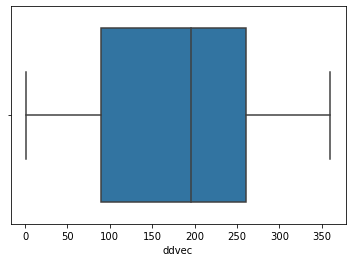

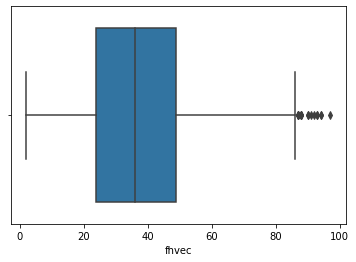

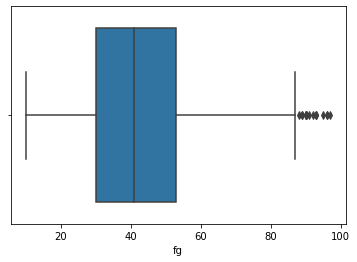

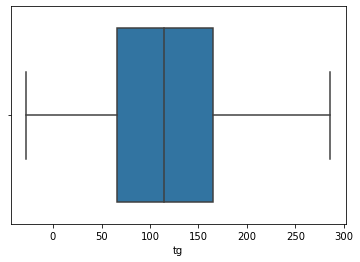

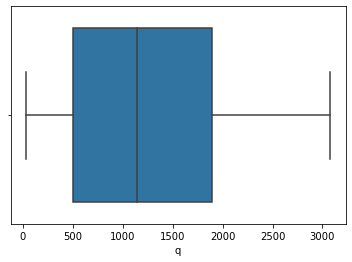

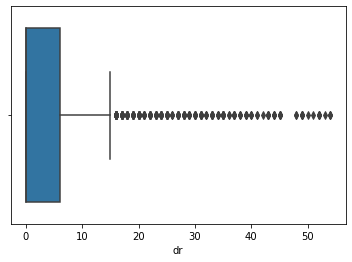

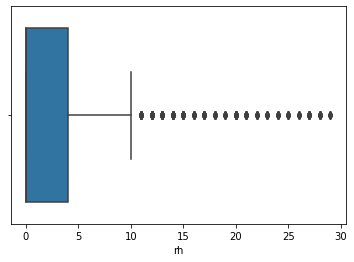

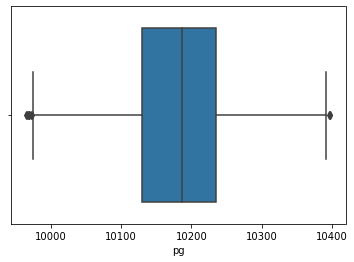

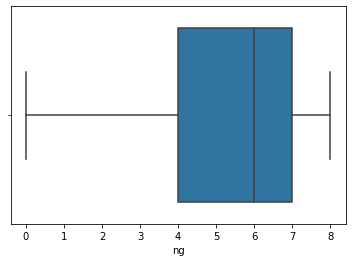

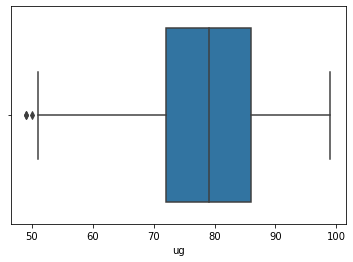

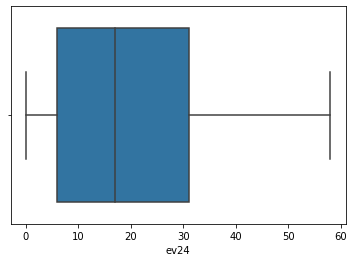

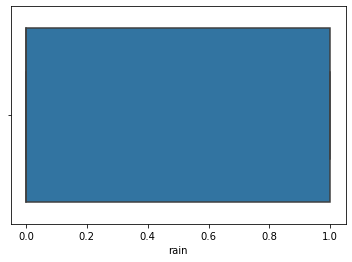

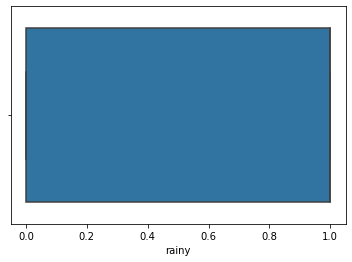

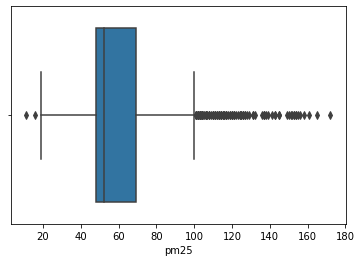

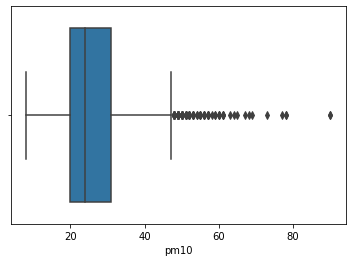

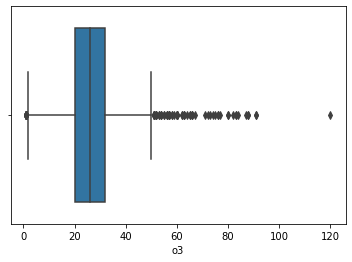

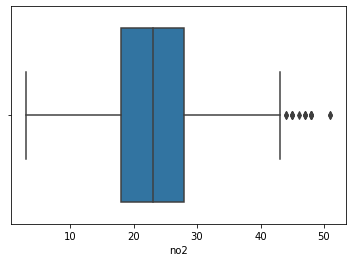

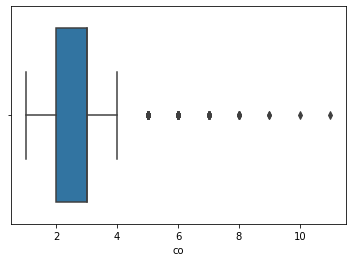

TypeError: Horizontal orientation requires numeric `x` variable.

In [28]:
boxplots(data1)

In [29]:
corr_data = data1.select_dtypes([np.number])
correlations_matrix = corr_data.corr()
correlations_matrix

ddvec     fhvec        fg        tg         q        dr        rh  \
ddvec  1.000000  0.053791  0.109893  0.059906 -0.016392  0.142999  0.197677   
fhvec  0.053791  1.000000  0.960981 -0.144040 -0.193946  0.246202  0.201566   
fg     0.109893  0.960981  1.000000 -0.101772 -0.172028  0.297815  0.266731   
tg     0.059906 -0.144040 -0.101772  1.000000  0.646773 -0.156492 -0.081836   
q     -0.016392 -0.193946 -0.172028  0.646773  1.000000 -0.315321 -0.228574   
dr     0.142999  0.246202  0.297815 -0.156492 -0.315321  1.000000  0.801415   
rh     0.197677  0.201566  0.266731 -0.081836 -0.228574  0.801415  1.000000   
pg    -0.040659 -0.167859 -0.235385 -0.135035  0.066569 -0.298565 -0.320030   
ng     0.215784  0.170908  0.192809 -0.135172 -0.513857  0.320385  0.260562   
ug     0.135777 -0.023225 -0.040089 -0.435908 -0.758998  0.321947  0.258415   
ev24  -0.015151 -0.205990 -0.178479  0.740975  0.985196 -0.303109 -0.219910   
rain   0.260317  0.246641  0.310567 -0.128108 -0.345909  0.519850  0.536040   
rainy  0.207510  0.163942  0.199799 -0.155191 -0.233216  0.240548  0.278063   
pm25  -0.228660 -0.183514 -0.213641 -0.220122 -0.194468 -0.086656 -0.149744   
pm10  -0.212392 -0.244465 -0.284205 -0.130552 -0.105871 -0.199049 -0.214392   
o3    -0.006058 -0.098920 -0.064470  0.557451  0.635136 -0.098734 -0.067482   
no2   -0.097309 -0.307073 -0.321211 -0.118297 -0.059629 -0.090570 -0.077090   
co    -0.155579 -0.296934 -0.333301 -0.203527 -0.211163 -0.100602 -0.096540   

             pg        ng        ug      ev24      rain     rainy      pm25  \
ddvec -0.040659  0.215784  0.135777 -0.015151  0.260317  0.207510 -0.228660   
fhvec -0.167859  0.170908 -0.023225 -0.205990  0.246641  0.163942 -0.183514   
fg    -0.235385  0.192809 -0.040089 -0.178479  0.310567  0.199799 -0.213641   
tg    -0.135035 -0.135172 -0.435908  0.740975 -0.128108 -0.155191 -0.220122   
q      0.066569 -0.513857 -0.758998  0.985196 -0.345909 -0.233216 -0.194468   
dr    -0.298565  0.320385  0.321947 -0.303109  0.519850  0.240548 -0.086656   
rh    -0.320030  0.260562  0.258415 -0.219910  0.536040  0.278063 -0.149744   
pg     1.000000 -0.223283 -0.085248  0.029502 -0.324133 -0.187509  0.076103   
ng    -0.223283  1.000000  0.440560 -0.475494  0.416789  0.241196 -0.021505   
ug    -0.085248  0.440560  1.000000 -0.733418  0.309319  0.257782  0.212748   
ev24   0.029502 -0.475494 -0.733418  1.000000 -0.333422 -0.240936 -0.184707   
rain  -0.324133  0.416789  0.309319 -0.333422  1.000000  0.361604 -0.129251   
rainy -0.187509  0.241196  0.257782 -0.240936  0.361604  1.000000 -0.230959   
pm25   0.076103 -0.021505  0.212748 -0.184707 -0.129251 -0.230959  1.000000   
pm10   0.160557 -0.147970  0.063573 -0.101036 -0.241901 -0.231559  0.506202   
o3    -0.001892 -0.251944 -0.568337  0.653805 -0.144639 -0.168251 -0.144258   
no2    0.093270 -0.257832  0.047399 -0.066593 -0.159157 -0.073514  0.194954   
co     0.105867 -0.083821  0.148164 -0.204806 -0.132997 -0.067578  0.322743   

           pm10        o3       no2        co  
ddvec -0.212392 -0.006058 -0.097309 -0.155579  
fhvec -0.244465 -0.098920 -0.307073 -0.296934  
fg    -0.284205 -0.064470 -0.321211 -0.333301  
tg    -0.130552  0.557451 -0.118297 -0.203527  
q     -0.105871  0.635136 -0.059629 -0.211163  
dr    -0.199049 -0.098734 -0.090570 -0.100602  
rh    -0.214392 -0.067482 -0.077090 -0.096540  
pg     0.160557 -0.001892  0.093270  0.105867  
ng    -0.147970 -0.251944 -0.257832 -0.083821  
ug     0.063573 -0.568337  0.047399  0.148164  
ev24  -0.101036  0.653805 -0.066593 -0.204806  
rain  -0.241901 -0.144639 -0.159157 -0.132997  
rainy -0.231559 -0.168251 -0.073514 -0.067578  
pm25   0.506202 -0.144258  0.194954  0.322743  
pm10   1.000000 -0.079571  0.448579  0.484329  
o3    -0.079571  1.000000 -0.025097 -0.230264  
no2    0.448579 -0.025097  1.000000  0.518461  
co     0.484329 -0.230264  0.518461  1.000000

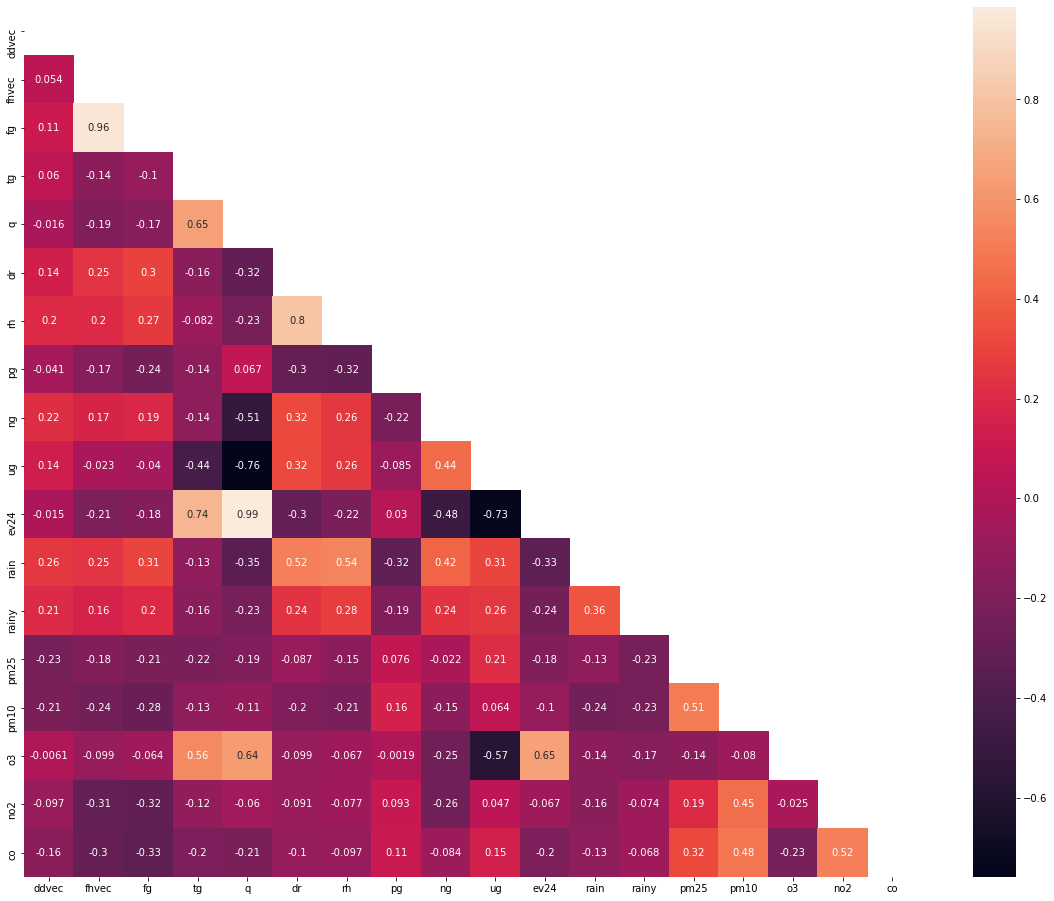

In [30]:
mask = np.zeros_like(correlations_matrix)

mask[np.triu_indices_from(mask)] = True # optional, to hide repeat half of the matrix

fig, ax = plt.subplots(figsize=(20, 16))
ax = sns.heatmap(correlations_matrix, mask=mask, annot=True)#change annot to False to hide the text, as it's unreadable
plt.show()

In [31]:
corr_data[(corr_data['o3'] > 0.8) | (corr_data['o3'] < -0.8)][['o3', 'ddvec']] # filtering for some analysis

o3  ddvec
date                 
20140101  25.0    168
20140102  25.0    191
20140104  25.0    169
20140105  25.0    194
20140107  25.0    205
...        ...    ...
20211111   9.0    177
20211112  15.0    171
20211114  15.0     64
20211115  13.0     63
20211116  25.0    173

[1960 rows x 2 columns]

In [32]:
data.corr()['pm25'].sort_values(ascending=False)

pm25     1.000000
pm10     0.517292
co       0.310542
no2      0.226717
pg       0.188223
ug       0.133053
ng      -0.073595
ev24    -0.085542
q       -0.088451
o3      -0.114473
dr      -0.164831
rh      -0.165585
tg      -0.175238
rain    -0.196583
fhvec   -0.239090
ddvec   -0.251866
fg      -0.268699
rainy   -0.278625
Name: pm25, dtype: float64

In [33]:
data.corr()['pm10'].sort_values(ascending=False)

pm10     1.000000
pm25     0.517292
co       0.453873
no2      0.425772
pg       0.259975
q       -0.000118
ev24    -0.002892
ug      -0.020014
o3      -0.060460
tg      -0.102652
ng      -0.206930
rh      -0.221202
ddvec   -0.240503
dr      -0.257877
fhvec   -0.270293
rainy   -0.282364
fg      -0.304907
rain    -0.315509
Name: pm10, dtype: float64

In [34]:
data.corr()['o3'].sort_values(ascending=False)

o3       1.000000
ev24     0.618733
q        0.600275
tg       0.519551
pg       0.030474
ddvec   -0.005413
fg      -0.023307
rh      -0.027347
fhvec   -0.045601
no2     -0.047650
pm10    -0.060460
dr      -0.094705
pm25    -0.114473
rain    -0.153325
rainy   -0.165468
co      -0.226356
ng      -0.251026
ug      -0.540689
Name: o3, dtype: float64

In [35]:
data.corr()['no2'].sort_values(ascending=False)

no2      1.000000
co       0.510532
pm10     0.425772
pm25     0.226717
pg       0.129532
ug       0.041468
q       -0.013023
ev24    -0.023723
o3      -0.047650
rainy   -0.100989
ddvec   -0.106654
rh      -0.130467
tg      -0.131302
dr      -0.140293
rain    -0.191319
ng      -0.270916
fhvec   -0.331744
fg      -0.344242
Name: no2, dtype: float64

In [36]:
data.corr()['co'].sort_values(ascending=False)

co       1.000000
no2      0.510532
pm10     0.453873
pm25     0.310542
ug       0.108482
pg       0.108411
rainy   -0.092855
ng      -0.101448
rh      -0.103839
dr      -0.114144
q       -0.134182
ev24    -0.134331
rain    -0.154734
ddvec   -0.166377
tg      -0.180425
o3      -0.226356
fhvec   -0.299397
fg      -0.318436
Name: co, dtype: float64

## Feature Engineering - Modelling

### Min-Max Scaler

#### KNN - OneHotEncoder

In [37]:
# the target was defined by the variable 'o3' because this is the one with the smaller values in the correlation matrix
y = data['o3']
X = data.drop(['o3'], axis=1)

In [38]:
numericals = X.select_dtypes(np.number)

In [39]:
transformer = MinMaxScaler().fit(numericals)
x_standardized = transformer.transform(numericals)

In [40]:
categoricals = X.select_dtypes(exclude=np.number)

In [41]:
encoder = OneHotEncoder(handle_unknown='error', drop='first').fit(categoricals)
encoded = encoder.transform(categoricals).toarray()

In [42]:
X = np.concatenate((x_standardized, encoded), axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=100)

In [43]:
model = KNeighborsRegressor(n_neighbors=4)
model.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=4)

In [44]:
predictions = model.predict(X_test)
modelscore = model.score(X_test, y_test)

In [46]:
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = math.sqrt(mse)
r2 = r2_score(y_test, predictions)
r2adj = 1 - (1-r2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

In [47]:
modelscore, mae, mse, rmse, r2adj

(0.5061772127410494,
 5.632380506091846,
 60.578549671977505,
 7.783222319321061,
 0.4933444742848495)

- Choosing the best value of `k` for the `KNN`

In [48]:
scores = []
for i in range(2,10):
    model = KNeighborsRegressor(n_neighbors=i)
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))

Text(0, 0.5, 'Accuracy')

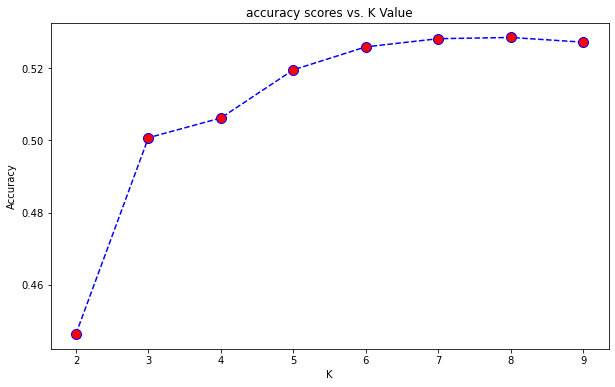

In [49]:
plt.figure(figsize=(10,6))
plt.plot(range(2,10),scores,color = 'blue', linestyle='dashed',
         marker='o', markerfacecolor='red', markersize=10)
plt.title('accuracy scores vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')

- Trying again with KNN = 7

In [50]:
model = KNeighborsRegressor(n_neighbors=7)
model.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=7)

In [51]:
predictions = model.predict(X_test)
modelscore = model.score(X_test, y_test)

In [53]:
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = math.sqrt(mse)
r2 = r2_score(y_test, predictions)
r2adj = 1 - (1-r2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

In [54]:
modelscore, mae, mse, rmse, r2adj

(0.5281185946687019,
 5.504485205516133,
 57.88694221831188,
 7.608346878153748,
 0.5158560364935865)

#### KNN - Get dummies

In [55]:
# the target was defined by the variable 'o3' because this is the one with the smaller values in the correlation matrix
y = data['o3']
X = data.drop(['o3'], axis=1)

In [56]:
numericals = X.select_dtypes(np.number)

In [57]:
transformer = MinMaxScaler().fit(numericals)
x_standardized = transformer.transform(numericals)

In [58]:
categoricals = X.select_dtypes(exclude=np.number)

In [59]:
encoded = pd.get_dummies(X)

In [60]:
X = np.concatenate((x_standardized, encoded), axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=100)

In [61]:
model = KNeighborsRegressor(n_neighbors=4)
model.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=4)

In [62]:
predictions = model.predict(X_test)
modelscore = model.score(X_test, y_test)

In [63]:
modelscore, mae, mse, rmse, r2adj

(0.42436006075892285,
 5.504485205516133,
 57.88694221831188,
 7.608346878153748,
 0.5158560364935865)

- Choosing the best value of `k` for the `KNN`

In [64]:
scores = []
for i in range(2,10):
    model = KNeighborsRegressor(n_neighbors=i)
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))

Text(0, 0.5, 'Accuracy')

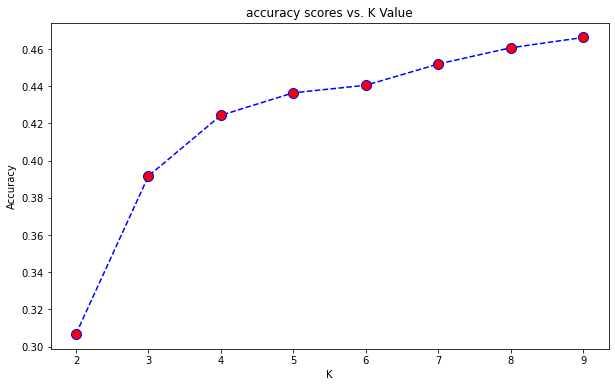

In [65]:
plt.figure(figsize=(10,6))
plt.plot(range(2,10),scores,color = 'blue', linestyle='dashed',
         marker='o', markerfacecolor='red', markersize=10)
plt.title('accuracy scores vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')

- Trying again with KNN = 9

In [66]:
model = KNeighborsRegressor(n_neighbors=9)
model.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=9)

In [67]:
predictions = model.predict(X_test)
modelscore = model.score(X_test, y_test)

In [69]:
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = math.sqrt(mse)
r2 = r2_score(y_test, predictions)
r2adj = 1 - (1-r2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

In [70]:
modelscore, mae, mse, rmse, r2adj

(0.46624441327563493,
 5.684577736124128,
 65.47721198236663,
 8.091799057216301,
 0.4410771557483565)

#### Linear Regression

In [71]:
# the target was defined by the variable 'o3' because this is the one with the smaller values in the correlation matrix
y = data['o3']
X = data.drop(['o3'], axis=1)

In [72]:
X_num = X.select_dtypes(include = np.number)
X_cat = X.select_dtypes(include = np.object)

In [73]:
# using standard scaler
transformer = MinMaxScaler()
# so make sure you do the train-test split first
# (train-test split comes first, or else your trainning set will carry information from your test set)
transformer.fit(X_num)

x_standardized = transformer.transform(X_num)

In [74]:
x_standardized.shape

(2666, 17)

In [75]:
pd.DataFrame(x_standardized).head()

0         1         2         3         4         5         6   \
0  0.462396  0.500000  0.463235  0.291022  0.048099  0.236607  0.066116   
1  0.465181  0.542857  0.514706  0.297214  0.049074  0.200893  0.046281   
2  0.529248  0.428571  0.441176  0.343653  0.052649  0.089286  0.026446   
3  0.551532  0.635714  0.639706  0.349845  0.044199  0.147321  0.054545   
4  0.467967  0.442857  0.433824  0.321981  0.049074  0.022321  0.006612   

         7      8         9         10   11   12        13        14  \
0  0.489392  1.000  0.746032  0.034483  1.0  1.0  0.242236  0.134146   
1  0.371994  0.875  0.841270  0.034483  1.0  1.0  0.242236  0.414634   
2  0.302687  0.625  0.825397  0.051724  1.0  1.0  0.242236  0.073171   
3  0.333805  0.750  0.793651  0.034483  1.0  1.0  0.242236  0.109756   
4  0.322489  0.875  0.793651  0.034483  1.0  1.0  0.242236  0.134146   

         15        16  
0  0.562500  0.142857  
1  0.604167  0.142857  
2  0.520833  0.142857  
3  0.479167  0.142857  
4  0.520833  0.142857

In [76]:
# watch out! rookie mistake: DO NOT dummify the target variable
X = pd.get_dummies(X)
X.head()

ddvec  fhvec  fg  tg    q  dr  rh     pg   ng  ug  ...  \
date                                                         ...   
20131231    167     72  73  66  179  53  40  10103  8.0  83  ...   
20140101    168     78  80  68  182  45  28  10020  7.0  89  ...   
20140102    191     62  70  83  193  20  16   9971  5.0  88  ...   
20140103    199     91  97  85  167  33  33   9993  6.0  86  ...   
20140104    169     64  69  76  182   5   4   9985  7.0  86  ...   

          pm10index_medium  pm10index_very low  o3index_low  o3index_medium  \
date                                                                          
20131231                 0                   1            0               0   
20140101                 0                   0            0               0   
20140102                 0                   1            0               0   
20140103                 0                   1            0               0   
20140104                 0                   1            0               0   

          o3index_very low  pm25index_high  pm25index_low  pm25index_medium  \
date                                                                          
20131231                 1               0              0                 1   
20140101                 1               0              0                 1   
20140102                 1               0              0                 1   
20140103                 1               0              0                 1   
20140104                 1               0              0                 1   

          pm25index_very high  pm25index_very low  
date                                               
20131231                    0                   0  
20140101                    0                   0  
20140102                    0                   0  
20140103                    0                   0  
20140104                    0                   0  

[5 rows x 31 columns]

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [78]:
# with 'add_constant' we force the model to have an intercept
X = sm.add_constant(X)

model = sm.OLS(y,X).fit() # to train the model

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                     o3   R-squared:                       0.625
Model:                            OLS   Adj. R-squared:                  0.621
Method:                 Least Squares   F-statistic:                     162.5
Date:                Sat, 27 Nov 2021   Prob (F-statistic):               0.00
Time:                        09:19:23   Log-Likelihood:                -8943.3
No. Observations:                2666   AIC:                         1.794e+04
Df Residuals:                    2638   BIC:                         1.811e+04
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  38.9184    

### Standard Scaler

#### KNN - OneHotEncoder

In [79]:
# the target was defined by the variable 'o3' because this is the one with the smaller values in the correlation matrix
y = data['o3']
X = data.drop(['o3'], axis=1)

In [80]:
numericals = X.select_dtypes(np.number)

In [81]:
transformer = StandardScaler().fit(numericals)
x_standardized = transformer.transform(numericals)

In [82]:
categoricals = X.select_dtypes(exclude=np.number)

In [83]:
encoder = OneHotEncoder(handle_unknown='error', drop='first').fit(categoricals)
encoded = encoder.transform(categoricals).toarray()

In [84]:
X = np.concatenate((x_standardized, encoded), axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=100)

In [85]:
model = KNeighborsRegressor(n_neighbors=4)
model.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=4)

In [86]:
predictions = model.predict(X_test)
modelscore = model.score(X_test, y_test)

In [88]:
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = math.sqrt(mse)
r2 = r2_score(y_test, predictions)
r2adj = 1 - (1-r2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

In [89]:
modelscore, mae, mse, rmse, r2adj

(0.5142745547622865,
 5.406044985941893,
 59.58522727272727,
 7.71914679694118,
 0.5016522380910465)

- Choosing the best value of `k` for the `KNN`

In [90]:
scores = []
for i in range(2,10):
    model = KNeighborsRegressor(n_neighbors=i)
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))

Text(0, 0.5, 'Accuracy')

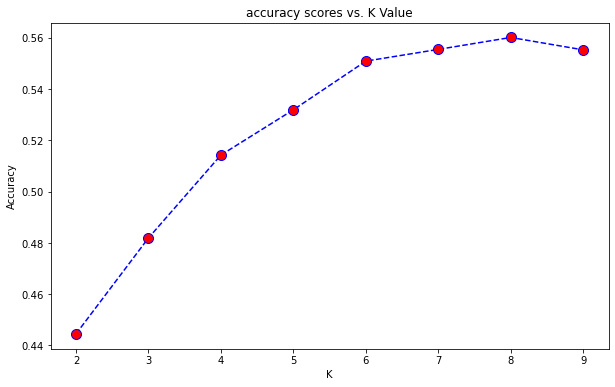

In [91]:
plt.figure(figsize=(10,6))
plt.plot(range(2,10),scores,color = 'blue', linestyle='dashed',
         marker='o', markerfacecolor='red', markersize=10)
plt.title('accuracy scores vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')

- Trying again with KNN = 8

In [92]:
model = KNeighborsRegressor(n_neighbors=8)
model.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=8)

In [93]:
predictions = model.predict(X_test)
modelscore = model.score(X_test, y_test)

In [95]:
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = math.sqrt(mse)
r2 = r2_score(y_test, predictions)
r2adj = 1 - (1-r2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

In [96]:
modelscore, mae, mse, rmse, r2adj

(0.5601667348738624,
 5.091377694470478,
 53.95551194939082,
 7.345441576201584,
 0.5487369965115855)

#### KNN - Get dummies

In [97]:
# the target was defined by the variable 'o3' because this is the one with the smaller values in the correlation matrix
y = data['o3']
X = data.drop(['o3'], axis=1)

In [98]:
numericals = X.select_dtypes(np.number)

In [99]:
transformer = StandardScaler().fit(numericals)
x_standardized = transformer.transform(numericals)

In [100]:
categoricals = X.select_dtypes(exclude=np.number)

In [101]:
encoded = pd.get_dummies(X)

In [102]:
X = np.concatenate((x_standardized, encoded), axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=100)

In [103]:
model = KNeighborsRegressor(n_neighbors=8)
model.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=8)

In [104]:
predictions = model.predict(X_test)
modelscore = model.score(X_test, y_test)

In [106]:
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = math.sqrt(mse)
r2 = r2_score(y_test, predictions)
r2adj = 1 - (1-r2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

In [107]:
modelscore, mae, mse, rmse, r2adj

(0.46011026985203685,
 5.680178069353327,
 66.22970360824742,
 8.138163405108514,
 0.43465377962895013)

- Choosing the best value of `k` for the `KNN`

In [108]:
scores = []
for i in range(2,10):
    model = KNeighborsRegressor(n_neighbors=i)
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))

Text(0, 0.5, 'Accuracy')

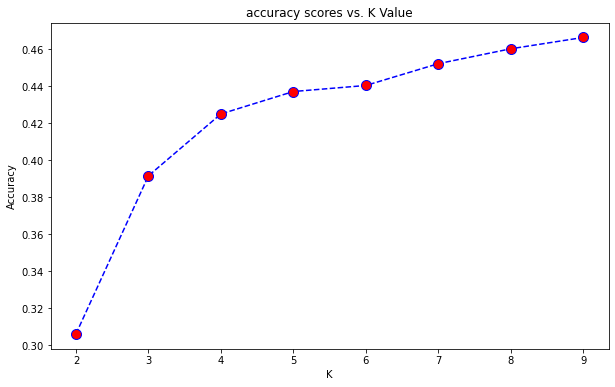

In [109]:
plt.figure(figsize=(10,6))
plt.plot(range(2,10),scores,color = 'blue', linestyle='dashed',
         marker='o', markerfacecolor='red', markersize=10)
plt.title('accuracy scores vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')

#### Linear Regression

In [110]:
# the target was defined by the variable 'o3' because this is the one with the smaller values in the correlation matrix
y = data['o3']
X = data.drop(['o3'], axis=1)

In [111]:
X_num = X.select_dtypes(include = np.number)
X_cat = X.select_dtypes(include = np.object)

In [112]:
# using standard scaler
transformer = StandardScaler()
# so make sure you do the train-test split first
# (train-test split comes first, or else your trainning set will carry information from your test set)
transformer.fit(X_num)

x_standardized = transformer.transform(X_num)

In [113]:
x_standardized.shape

(2666, 17)

In [114]:
pd.DataFrame(x_standardized).head()

0         1         2         3         4         5         6   \
0 -0.267422  1.270924  1.115786 -0.789728 -1.135745  1.297325  0.405868   
1 -0.256537  1.532655  1.436867 -0.755636 -1.132071  1.011207  0.137820   
2 -0.006182  0.834705  0.978179 -0.499942 -1.118597  0.117087 -0.130229   
3  0.080899  2.099739  2.216637 -0.465850 -1.150444  0.582030  0.249506   
4 -0.245652  0.921949  0.932310 -0.619266 -1.132071 -0.419384 -0.398277   

         7         8         9         10        11        12        13  \
0 -0.511531  1.005398  0.351366 -1.089774  0.798494  0.797864 -0.356415   
1 -1.352220  0.558890  0.961954 -1.089774  0.798494  0.797864 -0.356415   
2 -1.848531 -0.334128  0.860189 -1.020550  0.798494  0.797864 -0.356415   
3 -1.625697  0.112381  0.656660 -1.089774  0.798494  0.797864 -0.356415   
4 -1.706728  0.558890  0.656660 -1.089774  0.798494  0.797864 -0.356415   

         14        15        16  
0 -0.651278  0.929647 -0.037024  
1  1.753146  1.180223 -0.037024  
2 -1.173979  0.679072 -0.037024  
3 -0.860358  0.428497 -0.037024  
4 -0.651278  0.679072 -0.037024

In [115]:
# watch out! rookie mistake: DO NOT dummify the target variable
X = pd.get_dummies(X)
X.head()

ddvec  fhvec  fg  tg    q  dr  rh     pg   ng  ug  ...  \
date                                                         ...   
20131231    167     72  73  66  179  53  40  10103  8.0  83  ...   
20140101    168     78  80  68  182  45  28  10020  7.0  89  ...   
20140102    191     62  70  83  193  20  16   9971  5.0  88  ...   
20140103    199     91  97  85  167  33  33   9993  6.0  86  ...   
20140104    169     64  69  76  182   5   4   9985  7.0  86  ...   

          pm10index_medium  pm10index_very low  o3index_low  o3index_medium  \
date                                                                          
20131231                 0                   1            0               0   
20140101                 0                   0            0               0   
20140102                 0                   1            0               0   
20140103                 0                   1            0               0   
20140104                 0                   1            0               0   

          o3index_very low  pm25index_high  pm25index_low  pm25index_medium  \
date                                                                          
20131231                 1               0              0                 1   
20140101                 1               0              0                 1   
20140102                 1               0              0                 1   
20140103                 1               0              0                 1   
20140104                 1               0              0                 1   

          pm25index_very high  pm25index_very low  
date                                               
20131231                    0                   0  
20140101                    0                   0  
20140102                    0                   0  
20140103                    0                   0  
20140104                    0                   0  

[5 rows x 31 columns]

In [116]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [117]:
# with 'add_constant' we force the model to have an intercept
X = sm.add_constant(X)

model = sm.OLS(y,X).fit() # to train the model

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                     o3   R-squared:                       0.625
Model:                            OLS   Adj. R-squared:                  0.621
Method:                 Least Squares   F-statistic:                     162.5
Date:                Sat, 27 Nov 2021   Prob (F-statistic):               0.00
Time:                        09:20:12   Log-Likelihood:                -8943.3
No. Observations:                2666   AIC:                         1.794e+04
Df Residuals:                    2638   BIC:                         1.811e+04
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  38.9184    

In [118]:
# evaluating sklearn's LR model

#predictions = lm.predict(X) # predict some values

#rmse = mean_squared_error(y, predictions, squared=False) # or mse with squared=True
# r2 gives you an overall estimate of how good the model is, between 0 (lowest) and 1 (highest)
# rmse, good to see if the errors are big, the values returnes are in the unit of the target
#print("R2_score:", round(lm.score(X,y),2)) # or r2_score(Y, predictions)
#print("RMSE:", rmse)

<AxesSubplot:xlabel='tg', ylabel='o3'>

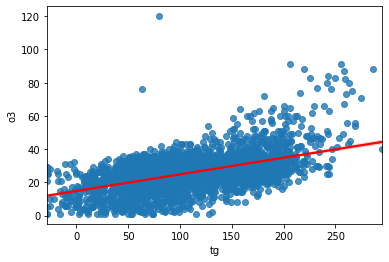

In [119]:
sns.regplot(X['tg'], y, line_kws={"color": "red"})

In [120]:
#sns.scatterplot(y,predictions)

In [122]:
#residuals = y - predictions
#sns.residplot(y,residuals)